## Linear Regression case study 

In [1]:
# import libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
data = pd.read_csv("auto-mpg.csv")  

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [7]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
car name         object
dtype: object

In [8]:
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())

In [9]:
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
32,25.0,4,98.0,?,2046,19.0,71,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl


In [10]:
data = data.replace('?',np.nan)
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
32,25.0,4,98.0,NaN,2046,19.0,71,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,amc concord dl


In [12]:
data['horsepower'] = data['horsepower'].astype('float64')

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [14]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
32,25.0,4,98.0,93.5,2046,19.0,71,ford pinto
126,21.0,6,200.0,93.5,2875,17.0,74,ford maverick
330,40.9,4,85.0,93.5,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,93.5,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,93.5,2320,15.8,81,renault 18i
374,23.0,4,151.0,93.5,3035,20.5,82,amc concord dl


In [15]:
data['car name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [17]:
data1 = data.copy()

In [18]:
data= data.drop('car name', axis=1)

In [19]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70


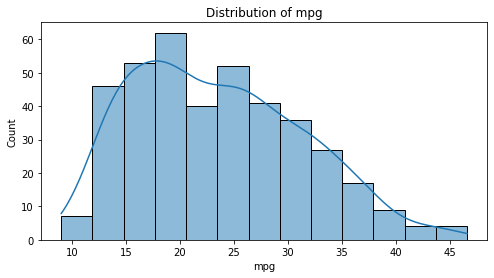

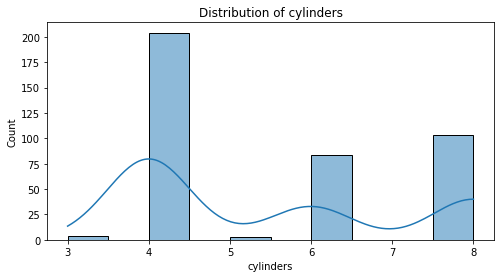

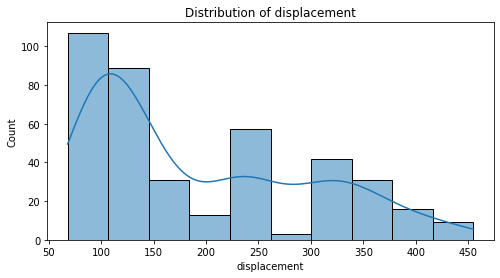

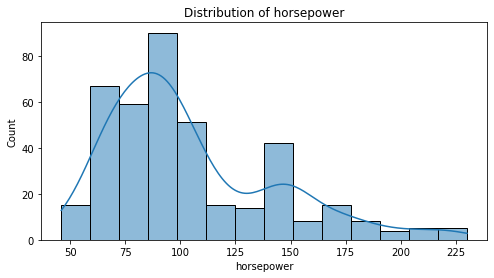

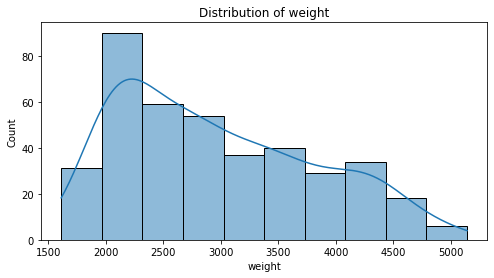

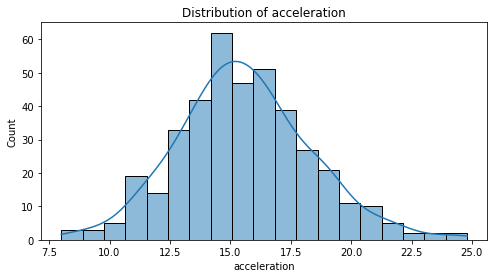

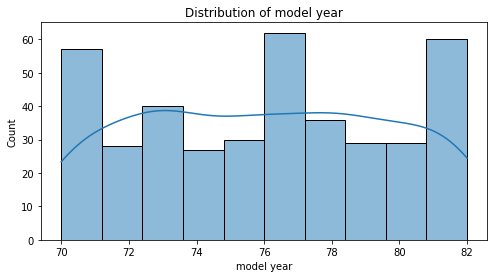

In [21]:
for col in data.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)  # Create a histogram with KDE (Kernel Density Estimation)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

<AxesSubplot:>

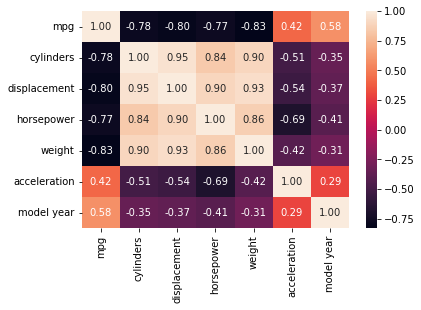

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot= True, fmt=".2f")

Cylinder ,displacement, horsepower and weight are highly positvely correlated.
mpg is negatively correlated with cylinder, weight, horsepower and weight. 

In [23]:
X = data.drop('mpg', axis =1)
y = data['mpg']

In [24]:
# Sklearn package's model_selection have a function train_test_split() is used for data splitting into test(out of sample) and train dataset
from sklearn.model_selection import train_test_split
# Split X and y into training and test set(out of sample data) in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [31]:
# import libraries for building linear regression model
#using statsmodel

from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [33]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [34]:
X_train_ols = sm.add_constant(X_train)
X_test_ols=sm.add_constant(X_test)
model1 = sm.OLS(y_train,X_train_ols).fit()
model1.summary()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           1.46e-91
Time:                        20:57:40   Log-Likelihood:                -744.60
No. Observations:                 278   AIC:                             1503.
Df Residuals:                     271   BIC:                             1529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.6217      5.694     -2.743   

In [35]:
# Checking model performance
model_pref(model1, X_train_ols, X_test_ols,y_train,y_test)  

    Data      RMSE       MAE       MAPE
0  Train  3.523532  2.729873  12.714357
1   Test  3.182169  2.479904  11.634185


###  Performing cross validation and comparing its average performance to OLS performance

In [36]:
# import the required function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# build the regression model using Sklearn Linear regression
linearregression = LinearRegression()    
cv_Score11 = cross_val_score(linearregression,X_train_ols,y_train,cv = 10) #cv=10 represents data is divided into 10 folds.
cv_Score12 = cross_val_score(linearregression,X_train_ols,y_train,cv = 10,
                             scoring = 'neg_mean_squared_error') 
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.784 (+/- 0.076)
Mean Squared Error: 13.116 (+/- 6.706)


In [37]:
coef = model1.params
coef

const          -15.621708
cylinders       -0.180958
displacement     0.010984
horsepower      -0.008983
weight          -0.007188
acceleration     0.029143
model year       0.788357
dtype: float64

In [46]:
# splitting the data in 70:30 ratio of train to test data
# separate the dependent and indepedent variable
Y1 = data['mpg']
X1 = data.drop(columns =('mpg'))
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.30 , random_state=1)

## Building a decision Tree 


In [40]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt = DecisionTreeRegressor(random_state = 1)
dt.fit(X_train1,y_train1)
model_pref(dt, X_train1, X_test1,y_train1,y_test1)  

    Data      RMSE    MAE       MAPE
0  Train  0.000000  0.000   0.000000
1   Test  4.167033  2.745  11.814997


###  Checking Feature importance

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

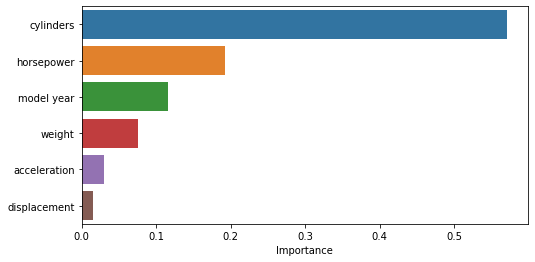

In [49]:
importances = dt.feature_importances_
columns=X1.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(importance_df.Importance,importance_df.index)

### Building Random Forest

In [51]:
#importing random forest regressor usinf sklearn

from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf.fit(X_train1,y_train1)
model_pref(rf, X_train1, X_test1,y_train1,y_test1)  

    Data      RMSE       MAE      MAPE
0  Train  1.036114  0.726144  3.082392
1   Test  2.779102  1.982858  8.609876


### Checking important features using Random Forest

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

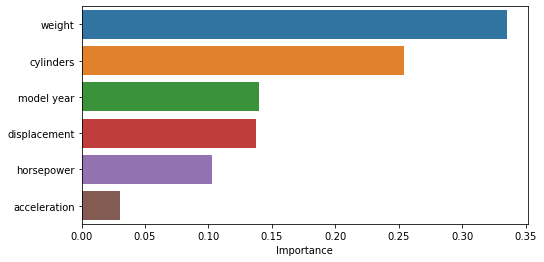

In [53]:
importances = rf.feature_importances_
columns=X1.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(importance_df.Importance,importance_df.index)

### Comparing the 3 models 

In [54]:
print("Linear Regression")
model_pref(model1, X_train_ols, X_test_ols,y_train,y_test)
print("Decision tree")
model_pref(dt, X_train1, X_test1,y_train1,y_test1)
print("Random Forest")
model_pref(rf, X_train1, X_test1,y_train1,y_test1)  

Linear Regression
    Data      RMSE       MAE       MAPE
0  Train  3.523532  2.729873  12.714357
1   Test  3.182169  2.479904  11.634185
Decision tree
    Data      RMSE    MAE       MAPE
0  Train  0.000000  0.000   0.000000
1   Test  4.167033  2.745  11.814997
Random Forest
    Data      RMSE       MAE      MAPE
0  Train  1.036114  0.726144  3.082392
1   Test  2.779102  1.982858  8.609876


In [55]:
Equation = "mpg="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

mpg=	( -15.621707993406922 ) *  const + ( -0.18095805032306078 ) *  cylinders + ( 0.010983679987754805 ) *  displacement + ( -0.008982747488096486 ) *  horsepower + ( -0.007188190332770654 ) *  weight + ( 0.029142901338763183 ) *  acceleration + ( 0.7883566858707732 ) *  model year + 